In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pathlib
path = pathlib.Path.cwd()

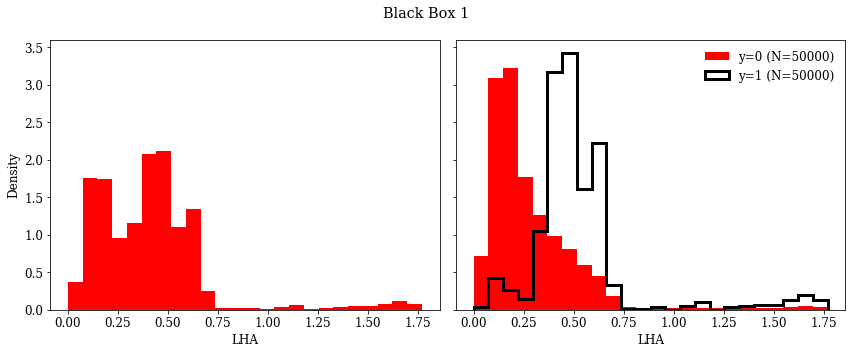

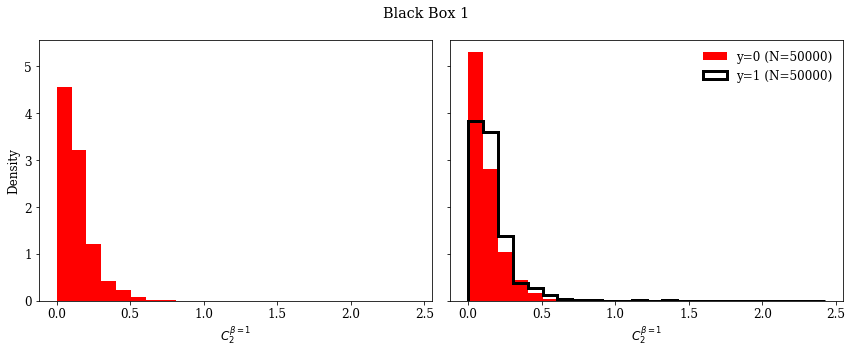

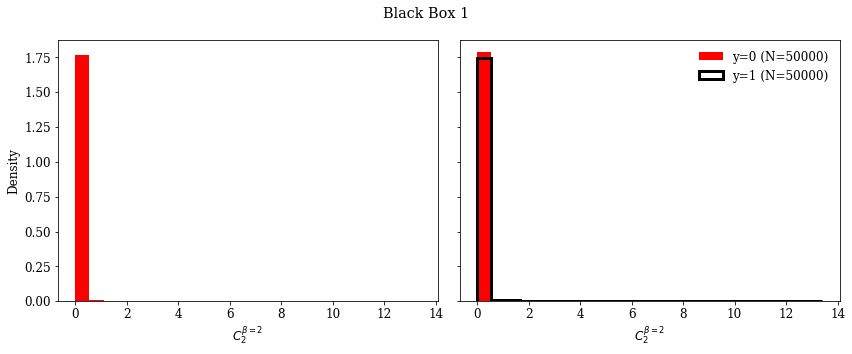

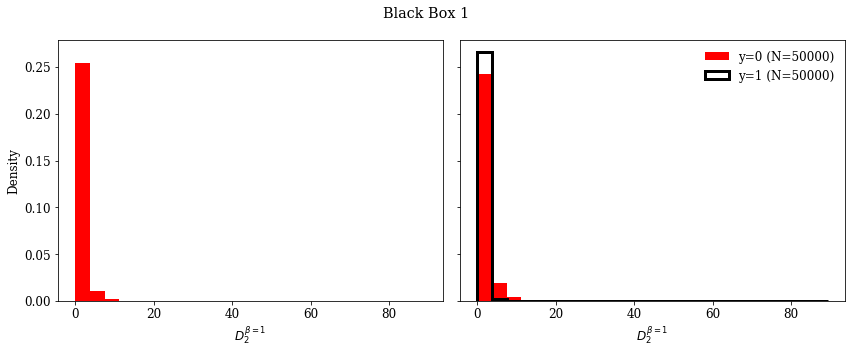

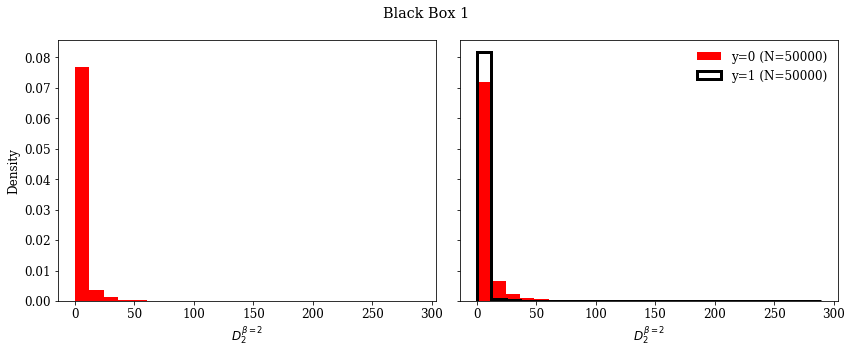

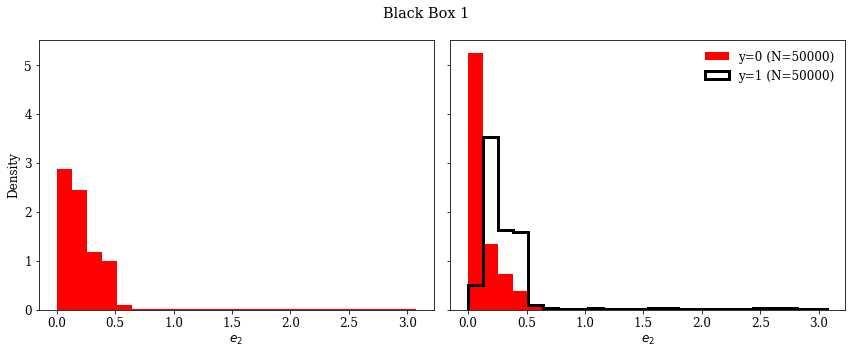

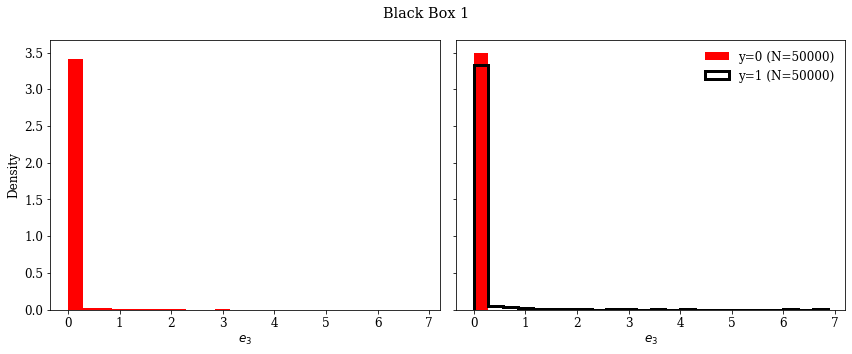

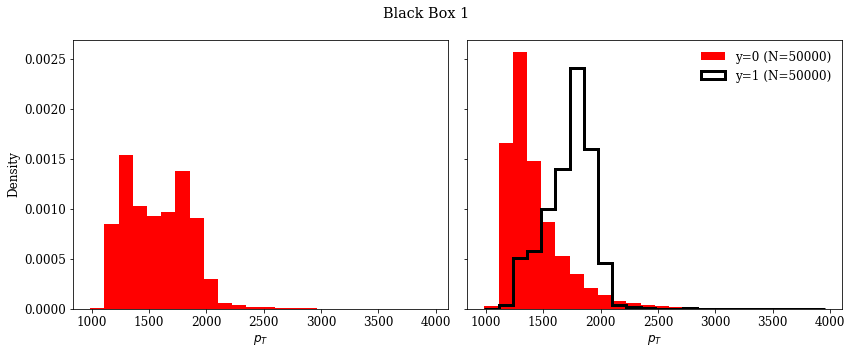

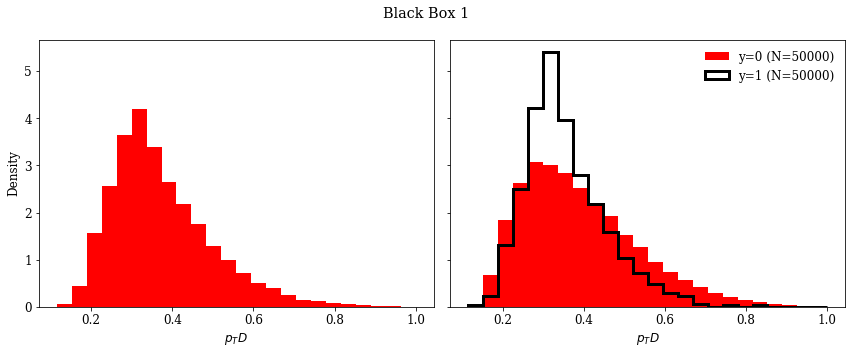

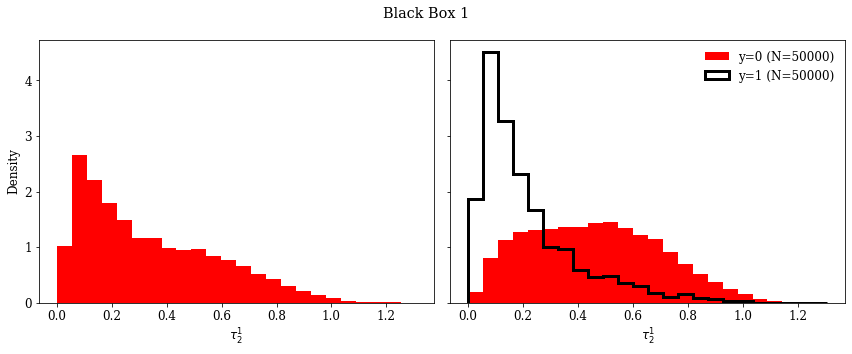

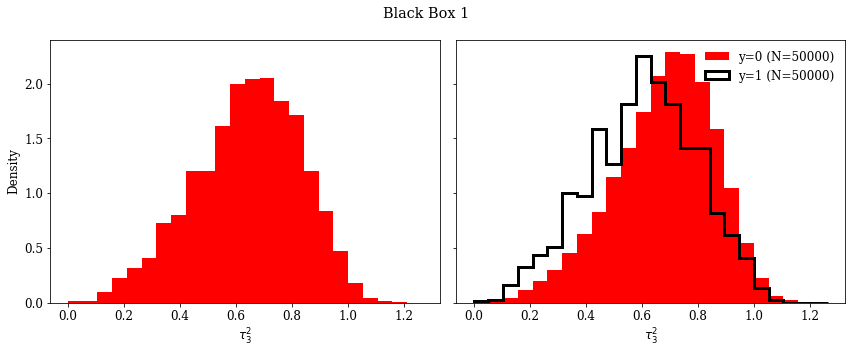

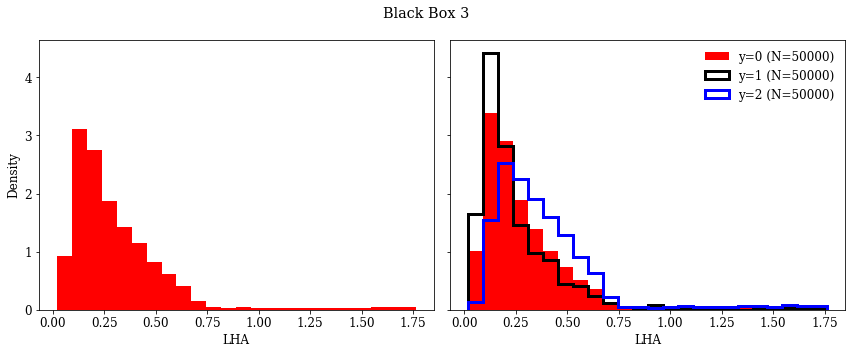

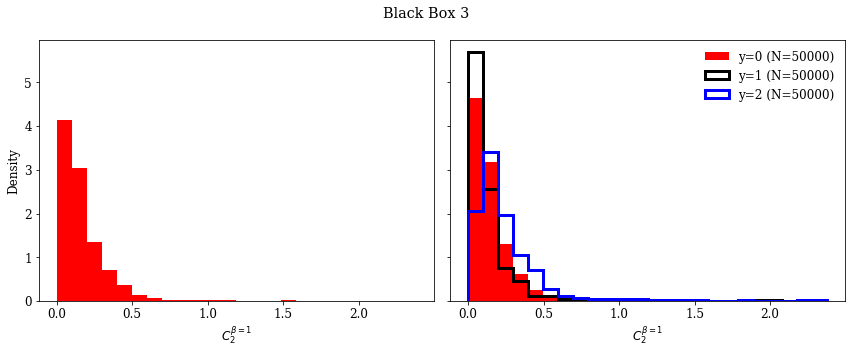

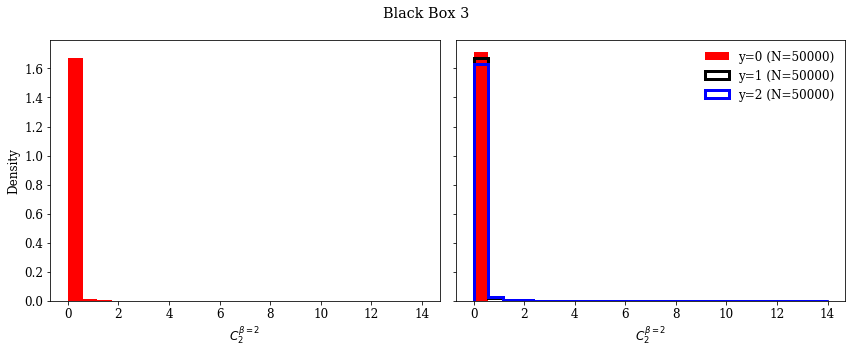

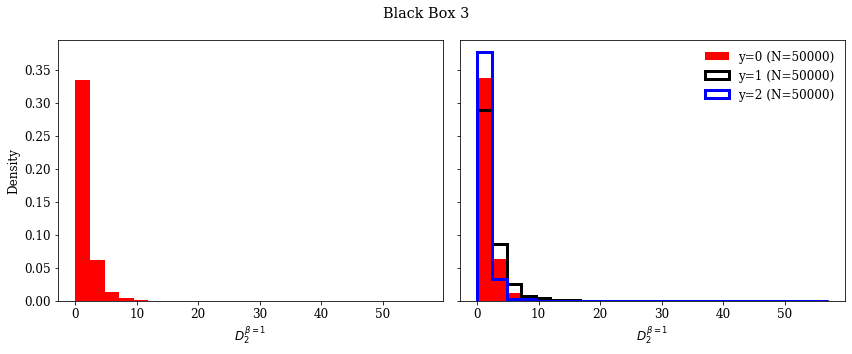

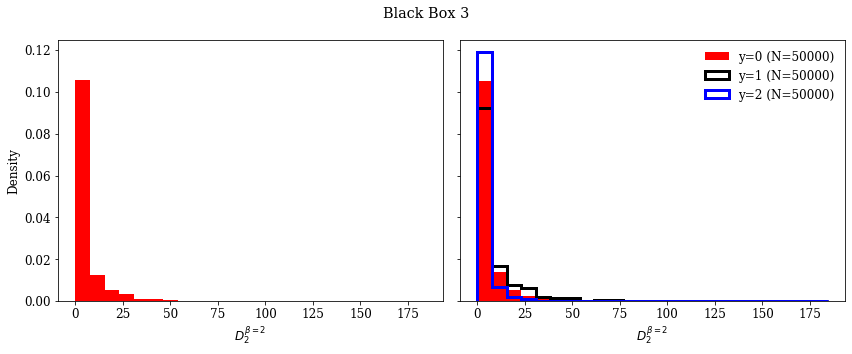

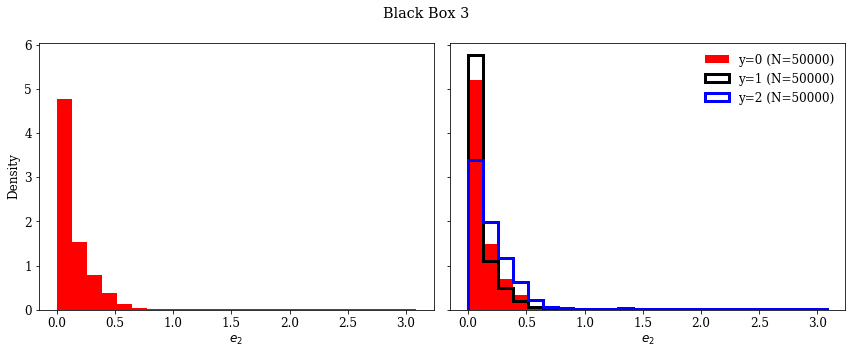

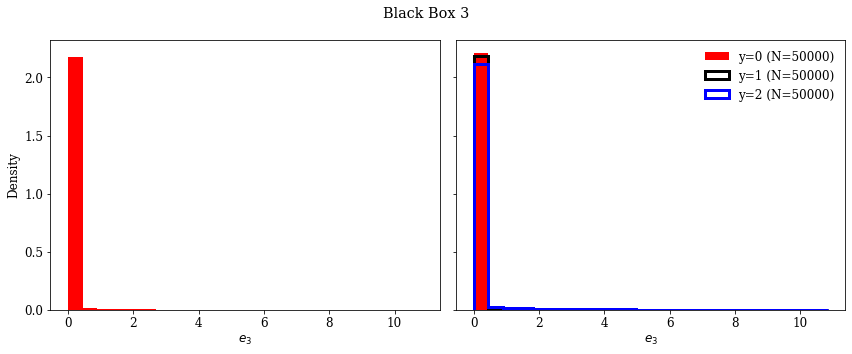

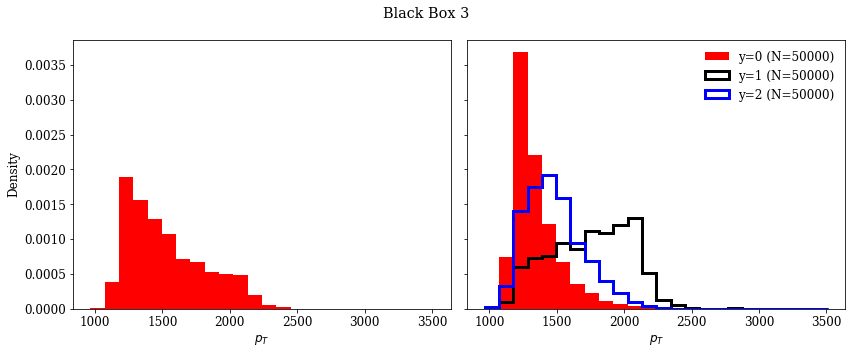

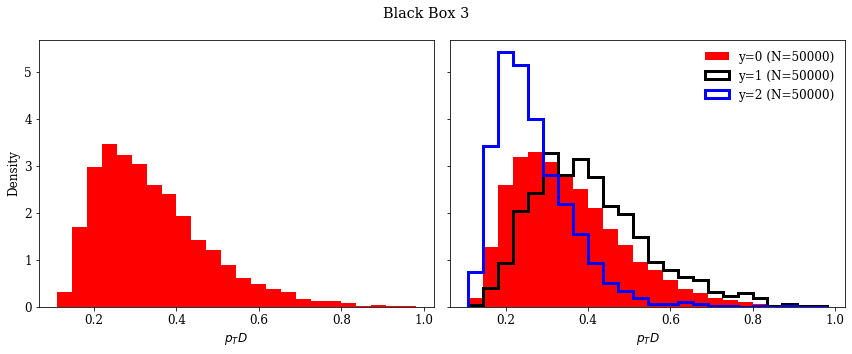

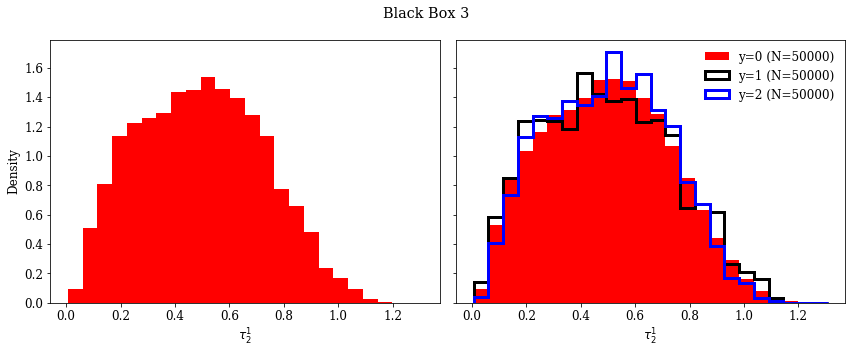

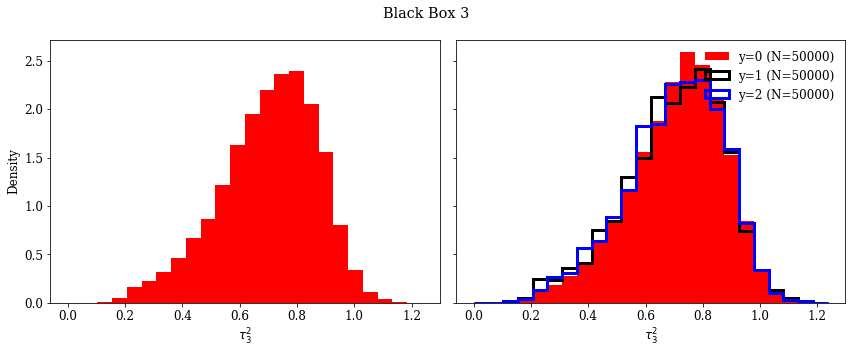

In [10]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams.update({'font.size': 12})

hl_path = path.parent / "HL"
tex_labels = {
        'LHA':"LHA", 
        'c2b1':"$C_2^{\\beta=1}$", 
        'c2b2':"$C_2^{\\beta=2}$", 
        'd2b1':"$D_2^{\\beta=1}$", 
        'd2b2':"$D_2^{\\beta=2}$", 
        'e2':"$e_2$", 
        'e3':"$e_3$", 
        'mass':"$M_{jet}$", 
        'pT':"$p_T$", 
        'pTD':"$p_TD$", 
        'rg':"$r_g$", 
        'tau21':"$\\tau_2^1$", 
        'tau32':"$\\tau_3^2$", 
        'zg':"$z_g$"
        }


colors = {0:"r", 1:"k", 2:"b"}
nbins = 25
bbxs = ["bb1", "bb2", "bb3", "bkg"]

for bbx in bbxs:
    hl_file = path.parent / "data" / "HL" / f"HL-{bbx}.h5"
    if hl_file.exists():
        df = pd.read_hdf(hl_file, "features")
        y = pd.read_hdf(hl_file, "targets").astype(np.int8)
        targets = list(set(y.targets.values))
        for label in sorted(list(df.columns)):
            fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5))
            
            reduced = pd.concat([df[label], y], axis=1)
            minx, maxx = reduced[label].min(), reduced[label].max()
            bins = np.linspace(minx, maxx, nbins)
            ax[0].hist(reduced[label], bins=bins, density=True, histtype="stepfilled", linewidth=3, color=colors[0])

            grouped = reduced.groupby(["targets"])
            ymax = 0
            for target in targets:
                X = grouped.get_group(target)[label].values
                if target == 0:
                    histtype = "stepfilled"
                else:
                    histtype = "step"
                ax[1].hist(X, bins=bins, density=True, histtype=histtype, linewidth=3, label=f"y={target} (N={len(X)})", color=colors[target])
            #ax[0].set_yscale("log")
            ymax = ax[0].get_ylim()[-1]
            #ax[0].set_ylim(top=ymax*5)
            ax[0].set_ylabel("Density")
            ax[0].set_xlabel(tex_labels[label])
            ax[1].set_xlabel(tex_labels[label])
            ax[1].legend(frameon=False)
            plt.suptitle(f"Black Box {bbx[-1]}")
            plt.subplots_adjust(wspace=0.1)
            plt.savefig(path.parent / "figures" / "HL" / bbx / "png" / f"{label}.png")
            plt.savefig(path.parent / "figures" / "HL" / bbx / "pdf" / f"{label}.pdf")
            plt.show()